In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Carregar base de dados

In [2]:
base_pricing = pd.read_csv('/content/drive/MyDrive/Contents/housing.csv')

In [3]:
base_pricing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
base_pricing.describe() # Descrevendo a base de dados

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
base_pricing.info() # Pegando as informações relevantes
# Perceba que existem valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
base_pricing.dropna(inplace=True) # Função utilizada para retirar valores nulos da base

In [7]:
base_pricing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
from sklearn.model_selection import train_test_split

x = base_pricing.drop(['median_house_value'], axis=1) # pegamos todas as features exceto 'median_house_value'
y = base_pricing['median_house_value'] # pegamos somente 'median_house_value' que é o que queremos prever

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2) # Criamos as variáveis de teste e treino
# as variáveis de teste possuem 20% do total de x e y

In [10]:
train_data = x_train.join(y_train) # criamos nossa base de treino unindo x_test e y_test

In [11]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1607,-122.08,37.87,24.0,6130.0,1359.0,1750.0,1286.0,2.9167,NEAR BAY,102700.0
7134,-118.10,34.01,23.0,1724.0,576.0,1336.0,542.0,1.3365,<1H OCEAN,183300.0
11108,-117.89,33.85,18.0,2036.0,414.0,1292.0,380.0,3.8750,<1H OCEAN,273000.0
4541,-118.20,34.03,37.0,1583.0,392.0,1776.0,377.0,2.7266,<1H OCEAN,140800.0
6264,-117.96,34.05,32.0,1993.0,388.0,1385.0,380.0,3.7258,<1H OCEAN,181900.0
...,...,...,...,...,...,...,...,...,...,...
16297,-121.22,37.96,30.0,1737.0,381.0,1177.0,347.0,1.9875,INLAND,56400.0
5110,-118.31,33.96,46.0,1686.0,303.0,870.0,320.0,3.4643,<1H OCEAN,136300.0
18225,-122.10,37.41,33.0,6277.0,1274.0,3025.0,1211.0,5.4721,NEAR BAY,343300.0
15286,-117.32,33.15,15.0,13245.0,2212.0,5495.0,2060.0,5.4904,NEAR OCEAN,262100.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

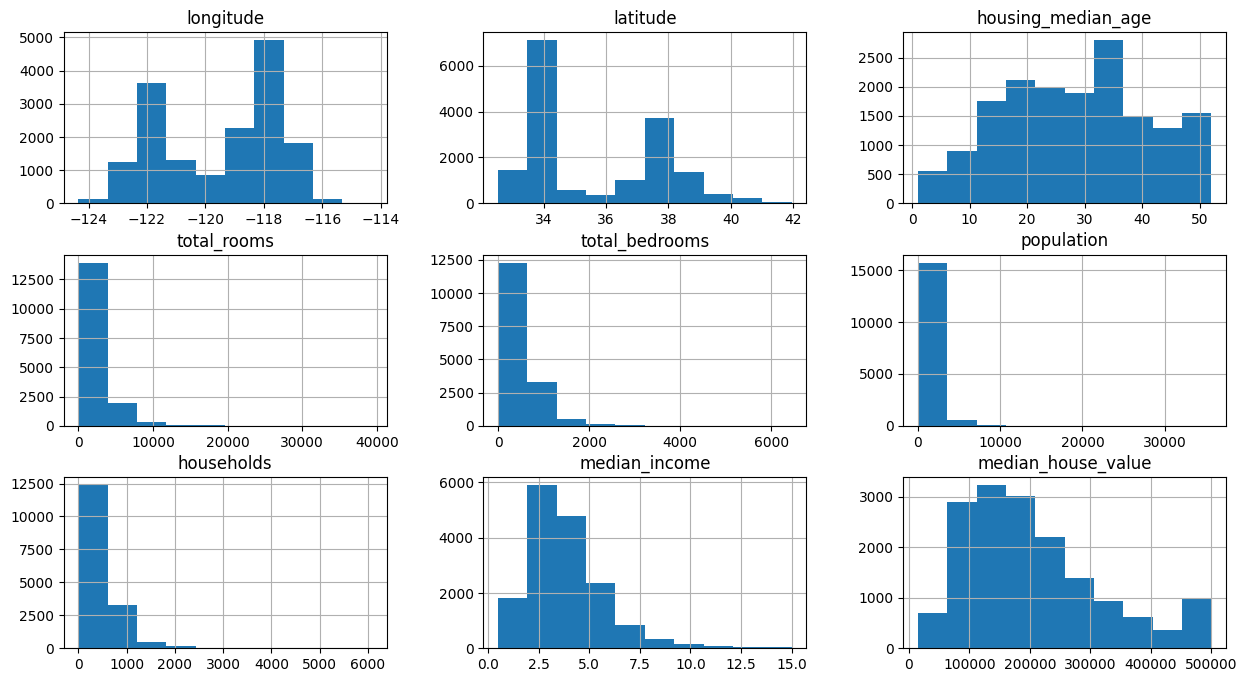

In [14]:
train_data.hist(figsize=(15,8)) # montamos histogramas para cada feature

## Pré-processamento

<ipython-input-18-e3fccf8821e7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

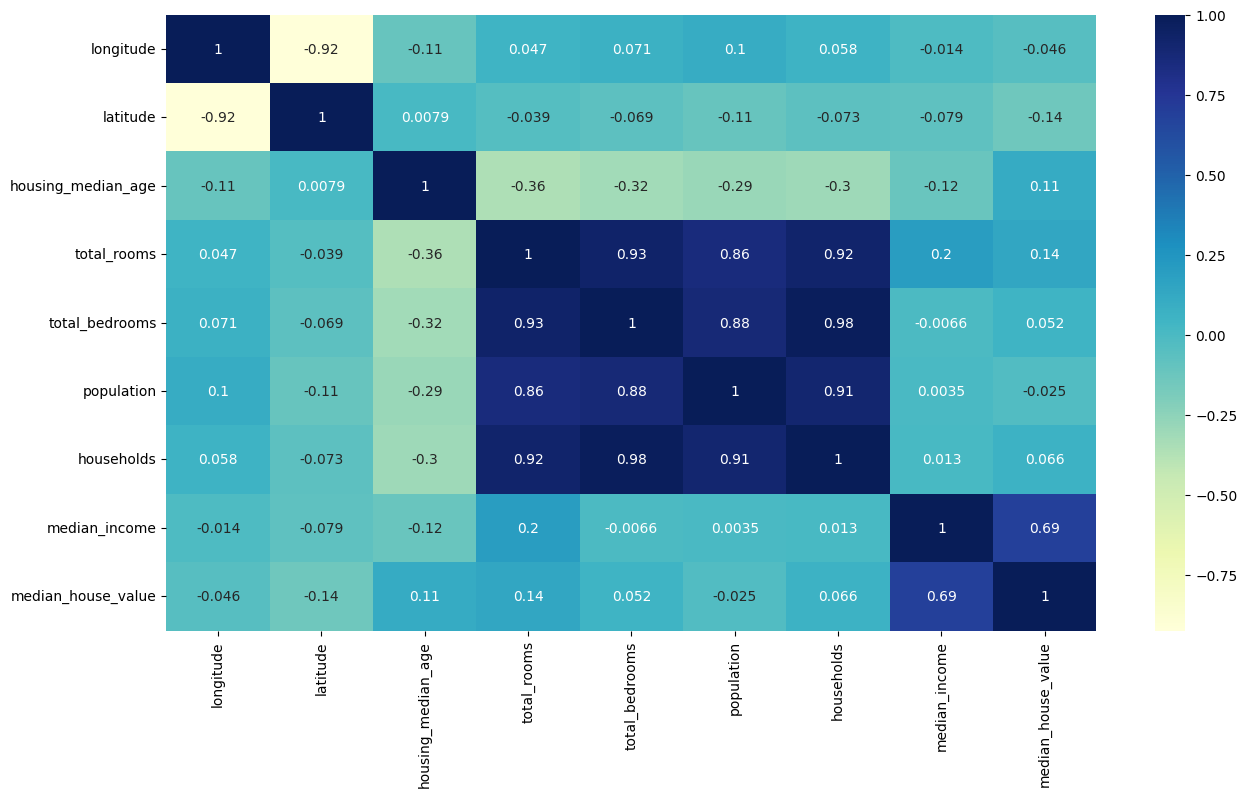

In [18]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu") # cria um mapa de calor, mostrando a correlação entre cada feature

In [19]:
# Utilizamos o np.log(+1) para exibir as variáveis numa forma gaussiana
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

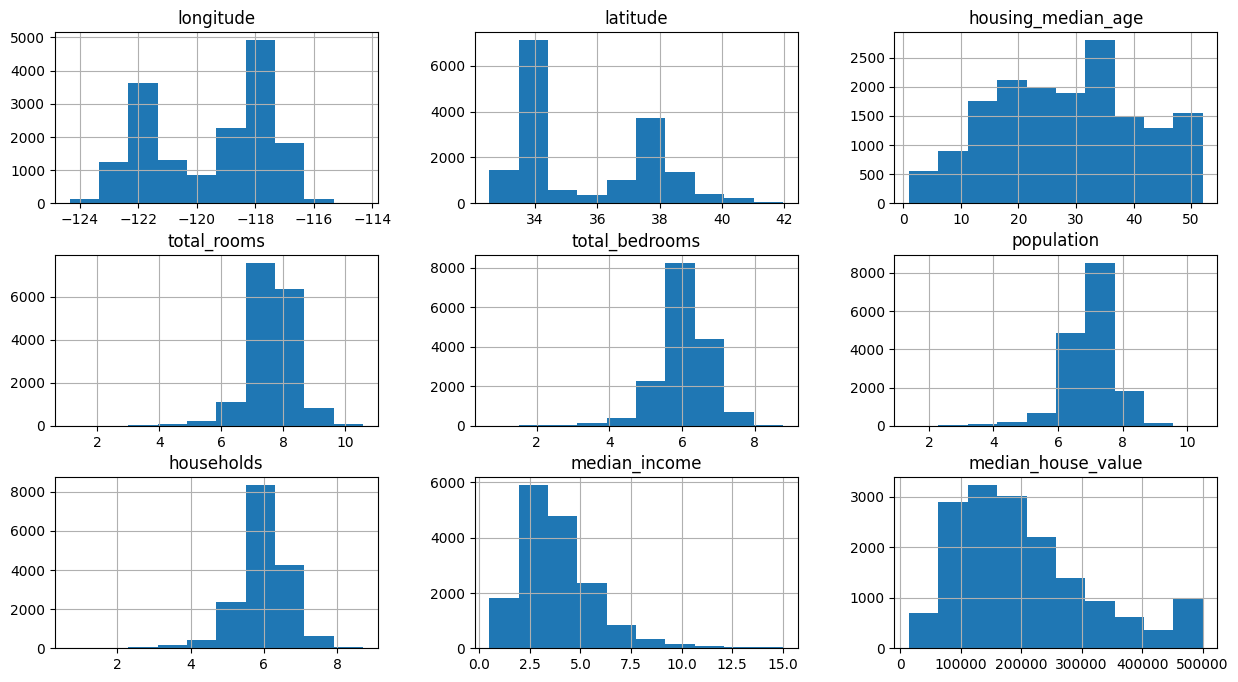

In [20]:
train_data.hist(figsize=(15,8))

In [21]:
train_data.ocean_proximity.value_counts() # verifica-se que as variáveis categóricas são importantes

<1H OCEAN     7237
INLAND        5181
NEAR OCEAN    2123
NEAR BAY      1801
ISLAND           4
Name: ocean_proximity, dtype: int64

In [35]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1) # criamos as features usando hotOneEncoding

AttributeError: ignored

<Axes: >

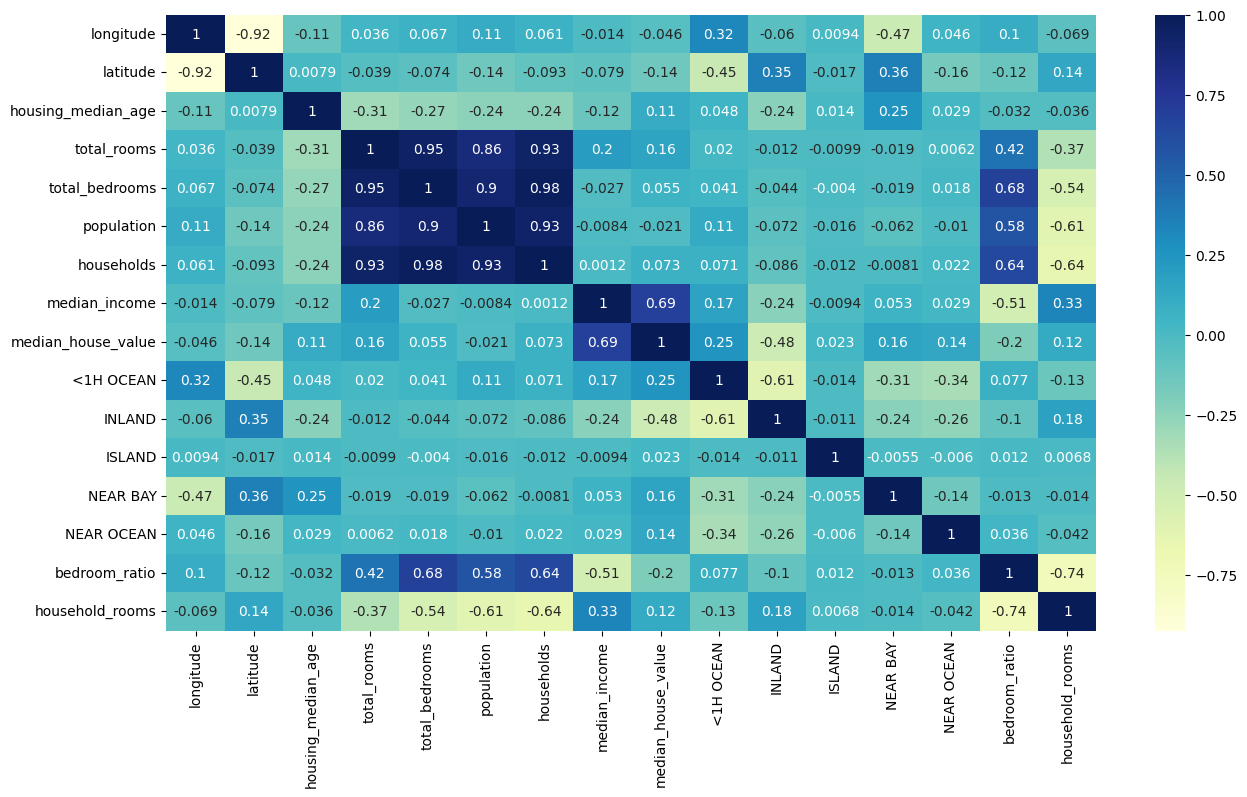

In [33]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

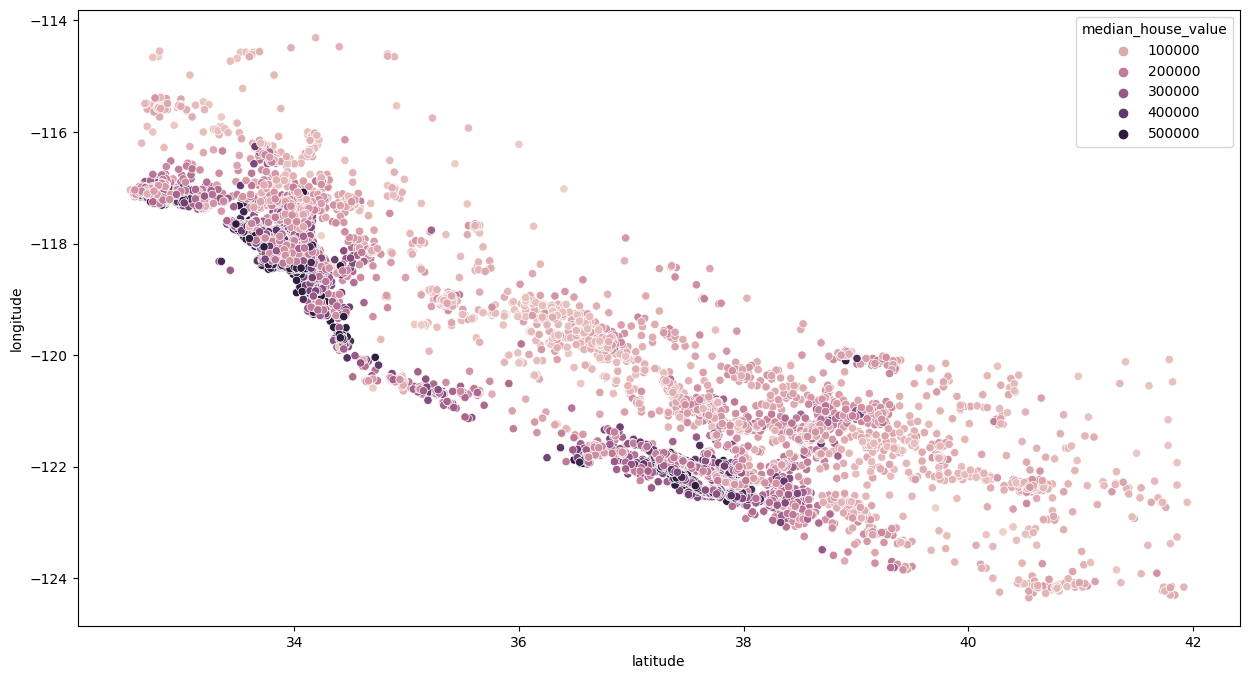

In [27]:
plt.figure(figsize=(15,8))

sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value") # usamos um scatterplot para visualizar como é o preço das casas dada proximidade com o oceano

In [36]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms'] # criamos a featurue de uma razão de quartos para salas no total
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households'] # razão de salas por casa

<Axes: >

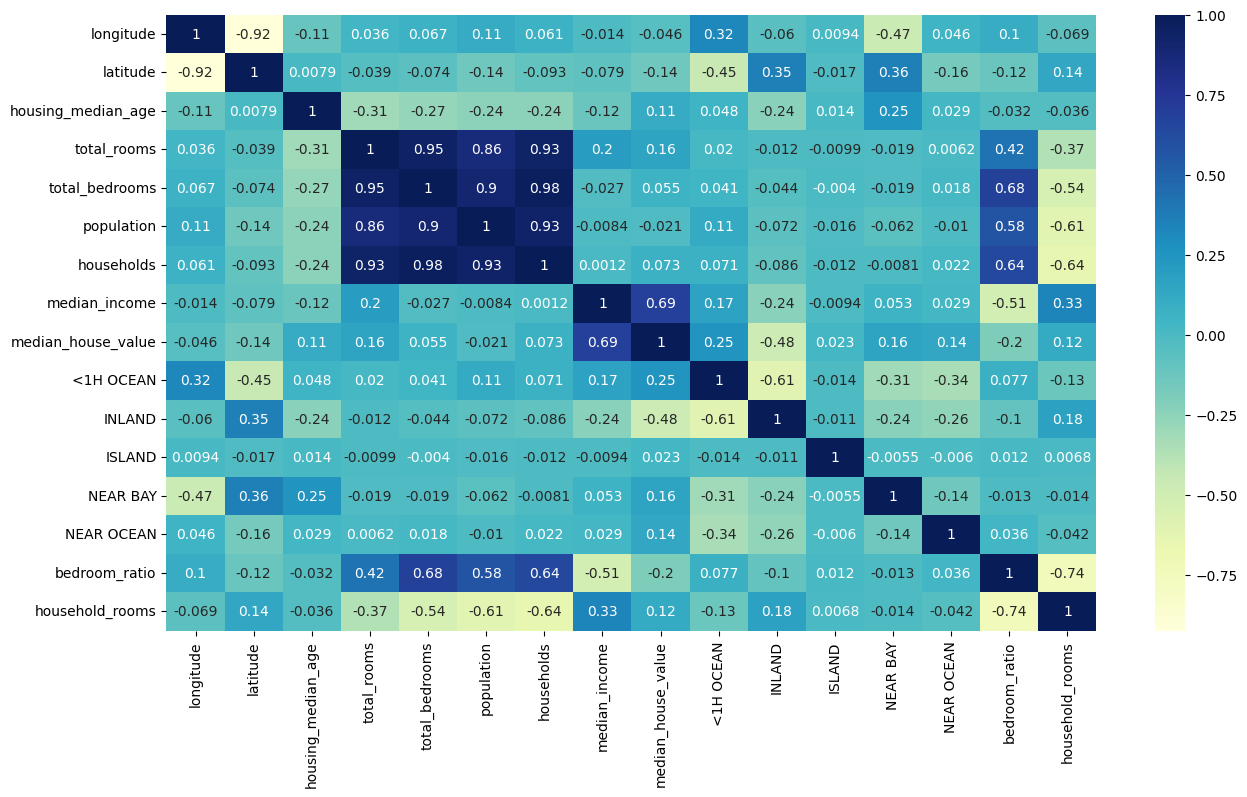

In [29]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu") # perceba que as novas features são mais correlacionadas com a variável alvo

## Modelo de regressão linear

In [53]:
from sklearn.linear_model import LinearRegression


x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [50]:
test_data = x_test.join(y_test)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms'] # criamos a featurue de uma razão de quartos para salas no total
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

AttributeError: ignored

In [57]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [63]:
reg.score(x_test, y_test)

-34.683730624071885

## Modelo Random Forest

In [59]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [60]:
forest.score(x_test, y_test)

0.7647119007476119

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [3, 10, 30],
    "max_features": [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [68]:
best_forest = grid_search.best_estimator_

In [69]:
best_forest.score(x_test, y_test)

0.7410616187160659